In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


# ***Data Exploration & Handling***

In [96]:
df = pd.read_csv(r"/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv", encoding="latin1")

In [97]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [98]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [100]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [101]:
df.describe(include="O")

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [102]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [103]:
df.shape

(10000, 6)

In [104]:
replacements = {
    "Yes" : "1",
    "No" : "0"
}
df["Extracurricular Activities"] = df["Extracurricular Activities"].replace(replacements)
df["Extracurricular Activities"] = pd.to_numeric(df["Extracurricular Activities"], errors="coerce")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


# ***Model Creation (Scratch)***

In [105]:
class LinearRegressionScratch:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y, iterations=1000, learning_rate=0.01):
        self.X = X
        self.y = y.reshape(-1, 1)
        n, m = self.X.shape
        self.coef_ = np.zeros(shape=(m, 1))
        self.intercept_ = 0
        self.learning_rate = learning_rate

        for _ in range(iterations):
            y_pred = self.X @ self.coef_ + self.intercept_
            errors = self.y - y_pred
            dw = -(2/n) * (self.X.T @ errors)
            db = -(2/n) * np.sum(errors)
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

    def predict(self, X):
        return (X @ self.coef_ + self.intercept_)

In [106]:
df = df.sample(frac=1).reset_index(drop=True)
split_index = int(0.8 * len(df))
train_data = df[:split_index]
test_data = df[split_index:]
X_train, y_train = train_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']].values, train_data['Performance Index'].values
X_test, y_test = test_data[['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced']].values, test_data['Performance Index'].values

In [107]:
mean, std = X_train.mean(axis=0), X_train.std(axis=0)
X_train_scaled = (X_train - mean) / std
X_test_scaled = (X_test - mean) / std

In [108]:
model = LinearRegressionScratch()
model.fit(X_train_scaled, y_train, 10000)

Text(0.5, 1.0, 'Actual vs Predicted Values')

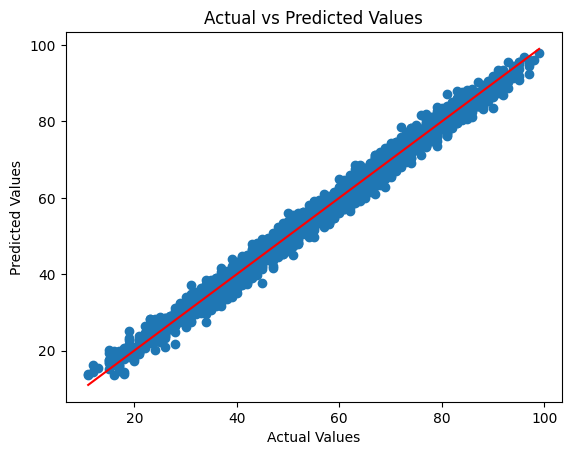

In [109]:
y_pred = model.predict(X_test_scaled)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.scatter(y_test, y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")

# ***Model Creating (Sklean)***

In [110]:
from sklearn.linear_model import LinearRegression

In [113]:
skl_model = LinearRegression()
skl_model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = skl_model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Values')

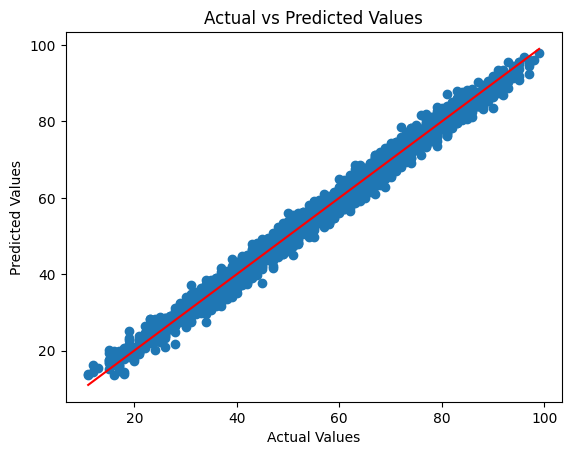

In [118]:
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.scatter(y_test, y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color="red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")